In [51]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats
from get_draws.api import get_draws

In [52]:
output_dirs = ['/ihme/costeffectiveness/results/vivarium_conic_lsff/v3.0_paf_of_one/ethiopia/2020_03_17_14_59_54/count_data/',
             '/ihme/costeffectiveness/results/vivarium_conic_lsff/v3.0_paf_of_one/india/2020_03_17_15_00_02/count_data/',
             '/ihme/costeffectiveness/results/vivarium_conic_lsff/v3.0_paf_of_one/nigeria/2020_03_17_15_00_10/count_data/']

locations = ['Ethiopia','India','Nigeria']

# Validate anemia prevalence using anemia impairment prevalence from GBD

In [53]:
# load anemia prevalence from model count space data
anemia_prev = pd.DataFrame()
for i in range(len(output_dirs)):
    overall_pt = pd.read_hdf(output_dirs[i] + 'person_time.hdf').groupby(['age_group','sex','input_draw']).sum()
    pt = pd.read_hdf(output_dirs[i] + 'person_time.hdf').groupby(['age_group','sex','input_draw','anemia_group']).sum()
    data = pt/overall_pt
    data = data.reset_index()
    data['location'] = locations[i]
    anemia_prev = anemia_prev.append(data)
anemia_prev.head()

,age_group,sex,input_draw,anemia_group,value,location
0,1_to_4,female,21,mild,0.276204,Ethiopia
1,1_to_4,female,21,moderate,0.323966,Ethiopia
2,1_to_4,female,21,none,0.380003,Ethiopia
3,1_to_4,female,21,severe,0.019828,Ethiopia
4,1_to_4,female,29,mild,0.273235,Ethiopia


In [54]:
# get means, min, max across draws
model_anemia = anemia_prev.where(anemia_prev['anemia_group'] != 'none').dropna().drop(columns='input_draw')
model_anemia = model_anemia.groupby(['location','sex','age_group','anemia_group']).describe().reset_index()
model_anemia.head()

location     sex       age_group anemia_group value                      \
                                                 count      mean       std   
0  Ethiopia  female          1_to_4         mild  25.0  0.271906  0.005562   
1  Ethiopia  female          1_to_4     moderate  25.0  0.310135  0.009406   
2  Ethiopia  female          1_to_4       severe  25.0  0.018922  0.001203   
3  Ethiopia  female  early_neonatal         mild  25.0  0.269853  0.005030   
4  Ethiopia  female  early_neonatal     moderate  25.0  0.332354  0.008359   

                                                     
        min       25%       50%       75%       max  
0  0.259797  0.268332  0.270482  0.274603  0.286341  
1  0.290820  0.302330  0.310921  0.317365  0.325823  
2  0.016706  0.018006  0.018830  0.019687  0.021424  
3  0.258697  0.266337  0.269409  0.272241  0.281513  
4  0.311629  0.327493  0.333146  0.339430  0.345192

In [65]:
# get global anemia impairment prevalence 
gbd_anemia = get_draws('rei_id', [205,206,207], source='como', measure_id=5, location_id=[163,214,179], 
                   year_id=2017, gbd_round_id=5, age_group_id=[2,3,4,5])
gbd_anemia = gbd_anemia.where(gbd_anemia['cause_id'] == 294).dropna()
gbd_anemia = gbd_anemia.set_index(['age_group_id','location_id', 'measure_id', 'rei_id',
                                 'sex_id', 'year_id', 'metric_id','cause_id'])
gbd_anemia.head()

draw_0  \
age_group_id location_id measure_id rei_id sex_id year_id metric_id cause_id             
2.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.276554   
                                    206.0  1.0    2017.0  3.0       294.0     0.444160   
                                    207.0  1.0    2017.0  3.0       294.0     0.037626   
3.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.277298   
                                    206.0  1.0    2017.0  3.0       294.0     0.444833   

                                                                                draw_1  \
age_group_id location_id measure_id rei_id sex_id year_id metric_id cause_id             
2.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.291967   
                                    206.0  1.0    2017.0  3.0       294.0     0.448320   
                                    207.0  1.0    2017.0  3.0       294.0     0.036644   
3.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.294039   
                                    206.0  1.0    2017.0  3.0       294.0     0.450850   

                                                                               draw_10  \
age_group_id location_id measure_id rei_id sex_id year_id metric_id cause_id             
2.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.230818   
                                    206.0  1.0    2017.0  3.0       294.0     0.358147   
                                    207.0  1.0    2017.0  3.0       294.0     0.026005   
3.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.223985   
                                    206.0  1.0    2017.0  3.0       294.0     0.346968   

                                                                              draw_100  \
age_group_id location_id measure_id rei_id sex_id year_id metric_id cause_id             
2.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.226888   
                                    206.0  1.0    2017.0  3.0       294.0     0.331658   
                                    207.0  1.0    2017.0  3.0       294.0     0.025313   
3.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.221260   
                                    206.0  1.0    2017.0  3.0       294.0     0.321768   

                                                                              draw_101  \
age_group_id location_id measure_id rei_id sex_id year_id metric_id cause_id             
2.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.246119   
                                    206.0  1.0    2017.0  3.0       294.0     0.374808   
                                    207.0  1.0    2017.0  3.0       294.0     0.032522   
3.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.242841   
                                    206.0  1.0    2017.0  3.0       294.0     0.368194   

                                                                              draw_102  \
age_group_id location_id measure_id rei_id sex_id year_id metric_id cause_id             
2.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.219986   
                                    206.0  1.0    2017.0  3.0       294.0     0.337807   
                                    207.0  1.0    2017.0  3.0       294.0     0.025568   
3.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.212197   
                                    206.0  1.0    2017.0  3.0       294.0     0.325299   

                                                                              draw_103  \
age_group_id location_id measure_id rei_id sex_id year_id metric_id cause_id             
2.0          163.0       5.0        205.0  1.0    2017.0  3.0       294.0     0.291954   
                        

In [66]:
# get means and LCLs, UCLs
gbd = (gbd_anemia.apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)
       .drop(columns=['count','std','min','max','50%'])
       .rename(columns={'2.5%':'lower','97.5%':'upper'}).reset_index())
gbd.head()

,age_group_id,location_id,measure_id,rei_id,sex_id,year_id,metric_id,cause_id,mean,lower,upper
0,2.0,163.0,5.0,205.0,1.0,2017.0,3.0,294.0,0.271431,0.223730,0.306689
1,2.0,163.0,5.0,206.0,1.0,2017.0,3.0,294.0,0.410074,0.333562,0.472524
2,2.0,163.0,5.0,207.0,1.0,2017.0,3.0,294.0,0.030416,0.022725,0.038688
3,3.0,163.0,5.0,205.0,1.0,2017.0,3.0,294.0,0.271327,0.218463,0.310434
4,3.0,163.0,5.0,206.0,1.0,2017.0,3.0,294.0,0.409600,0.324479,0.478560


In [67]:
# rename variables for compatibility
gbd['age_group'] = 0
gbd['age_group'] = np.where(gbd['age_group_id'] == 2, 'early_neonatal', 
                           np.where(gbd['age_group_id'] == 3, 'late_neonatal',
                                    np.where(gbd['age_group_id'] == 4, 'post_neonatal', 
                                            '1_to_4')))
gbd['sex'] = np.where(gbd['sex_id'] == 1, 'male', 'female')
gbd['anemia_group'] = np.where(gbd['rei_id'] == 205, 'mild', 
                               np.where(gbd['rei_id'] == 206, 'moderate', 'severe'))
gbd['location'] = np.where(gbd['location_id'] == 163, 'India',
                          np.where(gbd['location_id'] == 214, 'Nigeria', 'Ethiopia'))
gbd = gbd.drop(columns=['age_group_id','location_id','rei_id','sex_id'])
gbd_anemia = gbd
gbd_anemia.head()

,measure_id,year_id,metric_id,cause_id,mean,lower,upper,age_group,sex,anemia_group,location
0,5.0,2017.0,3.0,294.0,0.271431,0.223730,0.306689,early_neonatal,male,mild,India
1,5.0,2017.0,3.0,294.0,0.410074,0.333562,0.472524,early_neonatal,male,moderate,India
2,5.0,2017.0,3.0,294.0,0.030416,0.022725,0.038688,early_neonatal,male,severe,India
3,5.0,2017.0,3.0,294.0,0.271327,0.218463,0.310434,late_neonatal,male,mild,India
4,5.0,2017.0,3.0,294.0,0.409600,0.324479,0.478560,late_neonatal,male,moderate,India


In [127]:
model_anemia = model_anemia.reset_index().sort_values(by='location')
gbd_anemia = gbd_anemia.reset_index().sort_values(by='location')

In [132]:
# define plotting function
def make_anemia_plots(severity):
    barWidth = 0.3

    fig,axs = plt.subplots(2,2)

    model = model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'male').dropna()
    model_min = (model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'male').dropna()
                    - model_anemia['value','min'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'male').dropna())
    model_max = (model_anemia['value','max'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'male').dropna()
                    - model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'male').dropna())

    gbd = gbd_anemia['mean'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == 'post_neonatal').where(gbd_anemia['sex'] == 'male').dropna()
    gbd_lower = (gbd_anemia['mean'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == 'post_neonatal').where(gbd_anemia['sex'] == 'male').dropna()
                 - gbd_anemia['lower'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == 'post_neonatal').where(gbd_anemia['sex'] == 'male').dropna())
    gbd_upper = (gbd_anemia['upper'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == 'post_neonatal').where(gbd_anemia['sex'] == 'male').dropna()
                 - gbd_anemia['mean'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == 'post_neonatal').where(gbd_anemia['sex'] == 'male').dropna())

    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[0,0].bar(a, gbd, yerr=[gbd_lower, gbd_upper], width=barWidth)
    axs[0,0].bar(b, model, yerr=[model_min, model_max], width=barWidth)
    axs[0,0].set_title('Post Neonatal Males')


    model = model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'male').dropna()
    model_min = (model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'male').dropna()
                    - model_anemia['value','min'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'male').dropna())
    model_max = (model_anemia['value','max'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'male').dropna()
                    - model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'male').dropna())

    gbd = gbd_anemia['mean'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == '1_to_4').where(gbd_anemia['sex'] == 'male').dropna()
    gbd_lower = (gbd_anemia['mean'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == '1_to_4').where(gbd_anemia['sex'] == 'male').dropna()
                 - gbd_anemia['lower'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == '1_to_4').where(gbd_anemia['sex'] == 'male').dropna())
    gbd_upper = (gbd_anemia['upper'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == '1_to_4').where(gbd_anemia['sex'] == 'male').dropna()
                 - gbd_anemia['mean'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == '1_to_4').where(gbd_anemia['sex'] == 'male').dropna())

    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[0,1].bar(a, gbd, yerr=[gbd_lower, gbd_upper], width=barWidth)
    axs[0,1].bar(b, model, yerr=[model_min, model_max], width=barWidth)
    axs[0,1].set_title('1-4 Males')

    model = model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'female').dropna()
    model_min = (model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'female').dropna()
                    - model_anemia['value','min'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'female').dropna())
    model_max = (model_anemia['value','max'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'female').dropna()
                    - model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'female').dropna())

    gbd = gbd_anemia['mean'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == 'post_neonatal').where(gbd_anemia['sex'] == 'female').dropna()
    gbd_lower = (gbd_anemia['mean'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == 'post_neonatal').where(gbd_anemia['sex'] == 'female').dropna()
                 - gbd_anemia['lower'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == 'post_neonatal').where(gbd_anemia['sex'] == 'female').dropna())
    gbd_upper = (gbd_anemia['upper'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == 'post_neonatal').where(gbd_anemia['sex'] == 'female').dropna()
                 - gbd_anemia['mean'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == 'post_neonatal').where(gbd_anemia['sex'] == 'female').dropna())

    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[1,0].bar(a, gbd, yerr=[gbd_lower, gbd_upper], width=barWidth)
    axs[1,0].bar(b, model, yerr=[model_min, model_max], width=barWidth)
    axs[1,0].set_title('Post Neonatal Females')


    model = model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'female').dropna()
    model_min = (model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'female').dropna()
                    - model_anemia['value','min'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'female').dropna())
    model_max = (model_anemia['value','max'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'female').dropna()
                    - model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'female').dropna())

    gbd = gbd_anemia['mean'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == '1_to_4').where(gbd_anemia['sex'] == 'female').dropna()
    gbd_lower = (gbd_anemia['mean'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == '1_to_4').where(gbd_anemia['sex'] == 'female').dropna()
                 - gbd_anemia['lower'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == '1_to_4').where(gbd_anemia['sex'] == 'female').dropna())
    gbd_upper = (gbd_anemia['upper'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == '1_to_4').where(gbd_anemia['sex'] == 'female').dropna()
                 - gbd_anemia['mean'].where(gbd_anemia['anemia_group'] == severity).where(gbd_anemia['age_group'] == '1_to_4').where(gbd_anemia['sex'] == 'female').dropna())

    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[1,1].bar(a, gbd, yerr=[gbd_lower, gbd_upper], width=barWidth)
    axs[1,1].bar(b, model, yerr=[model_min, model_max], width=barWidth)
    axs[1,1].set_title('1-4 Females')


    plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
             xticklabels=np.unique(model_anemia['location']))

    for ax in axs.flat:
        ax.set(ylabel='Prevalence')

    plt.legend(['Impariment Prevalence','Model Prevalence'], loc='best')
    plt.suptitle(f'{severity.capitalize()} Anemia Prevalence',x=0.9, y=1.7,fontsize=20)
    plt.subplots_adjust(right=1.7, top=1.5)
    #plt.tight_layout()

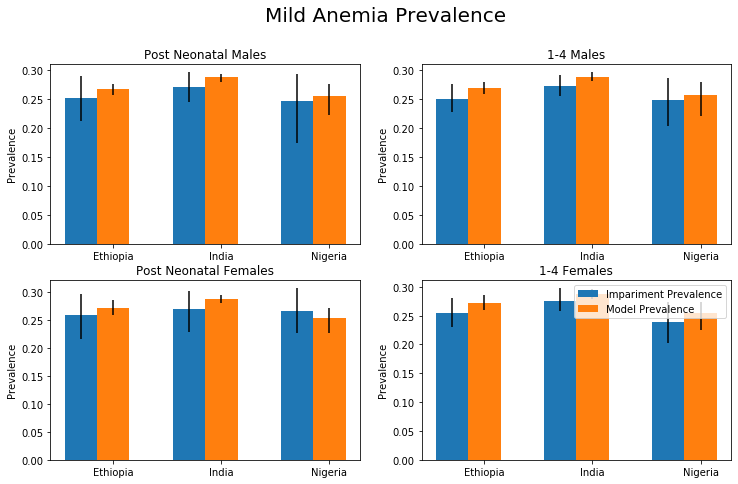

In [133]:
make_anemia_plots('mild')

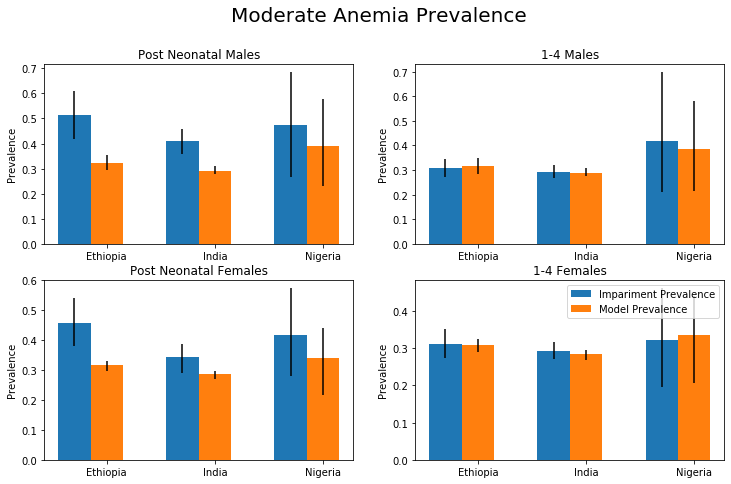

In [134]:
make_anemia_plots('moderate')

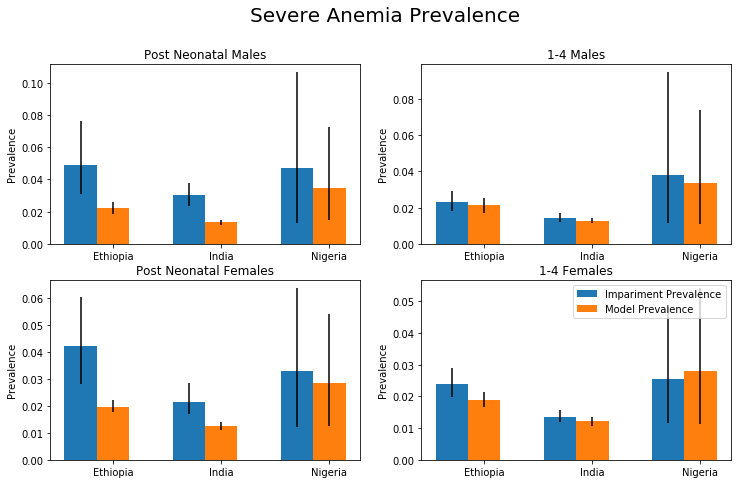

In [135]:
make_anemia_plots('severe')

# Validate YLDs using summed anemia sequela YLDs from GBD

In [289]:
# load anemia prevalence from model count space data
model_ylds = pd.DataFrame()
for i in range(len(output_dirs)):
    ylds = pd.read_hdf(output_dirs[i] + 'ylds.hdf')
    ylds = (ylds.where(ylds['cause'] == 'iron_deficiency').dropna()
            .groupby(['age_group','sex','anemia_group','input_draw']).sum())
    pt = pd.read_hdf(output_dirs[i] + 'person_time.hdf')
    pt = pt.groupby(['age_group','sex','input_draw']).sum()
    data = ylds/pt
    data = data.reset_index().drop(columns='input_draw').groupby(['age_group','sex','anemia_group']).describe().reset_index()
    data['location'] = locations[i]
    model_ylds = model_ylds.append(data)
model_ylds = model_ylds.sort_values(by='location')
model_ylds.head()

age_group     sex anemia_group value                                \
                                       count      mean       std       min   
0          1_to_4  female         mild  25.0  0.002814  0.001178  0.000945   
31  post_neonatal    male       severe  25.0  0.008888  0.001627  0.005991   
30  post_neonatal    male         none  25.0  0.000000  0.000000  0.000000   
29  post_neonatal    male     moderate  25.0  0.031847  0.006295  0.017935   
28  post_neonatal    male         mild  25.0  0.001062  0.000435  0.000364   

                                            location  
         25%       50%       75%       max            
0   0.002035  0.002517  0.003886  0.005250  Ethiopia  
31  0.007694  0.008840  0.009891  0.011865  Ethiopia  
30  0.000000  0.000000  0.000000  0.000000  Ethiopia  
29  0.029041  0.031938  0.034702  0.046188  Ethiopia  
28  0.000770  0.000953  0.001499  0.001909  Ethiopia

In [313]:
mild_anemia = [144, 172, 177, 182, 206, 240, 525, 531, 537, 645, 648, 651, 654, 1016, 1024, 1032, 1057, 1061, 1065, 1069, 1079, 1089, 1099, 1106, 1120, 1373, 1385, 1397, 1421, 1433, 1445, 4952, 4955, 4976, 4985, 4988, 5009, 5018, 5027, 5036, 5051, 5063, 5075, 5087, 5099, 5111, 5123, 5225, 5228, 5249, 5252, 5273, 5276, 5393, 5567, 5579, 5606, 5627, 5678, 7202, 7214]
moderate_anemia = [145, 173, 178, 183, 207, 241, 526, 532, 538, 646, 649, 652, 655, 1017, 1025, 1033, 1058, 1062, 1066, 1070, 1080, 1090, 1100, 1107, 1121, 1376, 1388, 1400, 1424, 1436, 1448, 4958, 4961, 4979, 4991, 4994, 5012, 5021, 5030, 5039, 5054, 5066, 5078, 5090, 5102, 5114, 5126, 5219, 5222, 5243, 5246, 5267, 5270, 5396, 5570, 5582, 5609, 5630, 5681, 7205, 7217]
severe_anemia = [146, 174, 179, 184, 208, 242, 527, 533, 539, 647, 650, 653, 656, 1018, 1026, 1034, 1059, 1060, 1063, 1064, 1067, 1068, 1071, 1074, 1075, 1077, 1081, 1083, 1085, 1087, 1091, 1093, 1095, 1097, 1101, 1108, 1122, 1379, 1391, 1403, 1427, 1439, 1451, 4964, 4967, 4982, 4997, 5000, 5015, 5024, 5033, 5042, 5057, 5069, 5081, 5093, 5105, 5117, 5129, 5213, 5216, 5237, 5240, 5261, 5264, 5399, 5573, 5585, 5612, 5633, 5684, 7208, 7220]
all_anemia = mild_anemia + moderate_anemia + severe_anemia
vitamin_a_anemia = [5393, 5396, 5399]

In [320]:
# get anemia sequela prevalence
gbd_ylds = get_outputs(gbd_round_id=5, year_id=2017, location_id=[163,214,179], age_group_id=[2,3,4,5],
                     measure_id=3, metric_id=3, sequela_id=all_anemia, topic='sequela', sex_id=[1,2])
gbd_ylds['anemia_group'] = np.where(gbd_ylds['sequela_id'].isin(mild_anemia), 'mild',
                                   np.where(gbd_ylds['sequela_id'].isin(moderate_anemia), 'moderate', 'severe'))

# double ylds due to vitamin A realted anemia to compare to our double counted numbers
gbd_ylds['val'] = np.where(gbd_ylds['sequela_id'].isin(vitamin_a_anemia), gbd_ylds['val'] * 2, gbd_ylds['val'])
gbd_ylds['upper'] = np.where(gbd_ylds['sequela_id'].isin(vitamin_a_anemia), gbd_ylds['upper'] * 2, gbd_ylds['upper'])
gbd_ylds['lower'] = np.where(gbd_ylds['sequela_id'].isin(vitamin_a_anemia), gbd_ylds['lower'] * 2, gbd_ylds['lower'])

# sum across sequela
gbd_ylds = gbd_ylds.groupby(['location_id','age_group_id','sex_id','anemia_group']).sum()
gbd_ylds = gbd_ylds[['val','upper','lower']]

# reformat variables for compatibility
gbd_ylds = gbd_ylds.reset_index()
gbd_ylds['age_group'] = 0
gbd_ylds['age_group'] = np.where(gbd_ylds['age_group_id'] == 2, 'early_neonatal', 
                           np.where(gbd_ylds['age_group_id'] == 3, 'late_neonatal',
                                    np.where(gbd_ylds['age_group_id'] == 4, 'post_neonatal', 
                                            '1_to_4')))
gbd_ylds['sex'] = np.where(gbd_ylds['sex_id'] == 1, 'male', 'female')
gbd_ylds['location'] = np.where(gbd_ylds['location_id'] == 163, 'India',
                          np.where(gbd_ylds['location_id'] == 214, 'Nigeria', 'Ethiopia'))
gbd_ylds = gbd_ylds.drop(columns=['age_group_id','location_id','sex_id'])
gbd_ylds = gbd_ylds.sort_values(by='location').rename(columns={'val':'mean'})
gbd_ylds.head()

,anemia_group,mean,upper,lower,age_group,sex,location
35,severe,0.011413,0.018990,0.006119,late_neonatal,female,Ethiopia
26,severe,0.013268,0.023700,0.006976,early_neonatal,male,Ethiopia
27,mild,0.001798,0.004074,0.000633,early_neonatal,female,Ethiopia
28,moderate,0.043904,0.065402,0.026173,early_neonatal,female,Ethiopia
29,severe,0.011425,0.018704,0.006077,early_neonatal,female,Ethiopia


In [321]:
# define plotting function
def make_anemia_ylds_plots(severity):
    barWidth = 0.3

    fig,axs = plt.subplots(2,2)

    model = model_ylds['value','mean'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == 'post_neonatal').where(model_ylds['sex'] == 'male').dropna().values
    model_min = (model_ylds['value','mean'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == 'post_neonatal').where(model_ylds['sex'] == 'male').dropna().values
                    - model_ylds['value','min'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == 'post_neonatal').where(model_ylds['sex'] == 'male').dropna().values)
    model_max = (model_ylds['value','max'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == 'post_neonatal').where(model_ylds['sex'] == 'male').dropna().values
                    - model_ylds['value','mean'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == 'post_neonatal').where(model_ylds['sex'] == 'male').dropna().values)

    gbd = gbd_ylds['mean'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == 'post_neonatal').where(gbd_ylds['sex'] == 'male').dropna().values
    gbd_lower = (gbd_ylds['mean'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == 'post_neonatal').where(gbd_ylds['sex'] == 'male').dropna().values
                 - gbd_ylds['lower'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == 'post_neonatal').where(gbd_ylds['sex'] == 'male').dropna().values)
    gbd_upper = (gbd_ylds['upper'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == 'post_neonatal').where(gbd_ylds['sex'] == 'male').dropna().values
                 - gbd_ylds['mean'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == 'post_neonatal').where(gbd_ylds['sex'] == 'male').dropna().values)

    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[0,0].bar(a, gbd, yerr=[gbd_lower, gbd_upper], width=barWidth)
    axs[0,0].bar(b, model, yerr=[model_min, model_max], width=barWidth)
    axs[0,0].set_title('Post Neonatal Males')


    model = model_ylds['value','mean'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == '1_to_4').where(model_ylds['sex'] == 'male').dropna().values
    model_min = (model_ylds['value','mean'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == '1_to_4').where(model_ylds['sex'] == 'male').dropna().values
                    - model_ylds['value','min'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == '1_to_4').where(model_ylds['sex'] == 'male').dropna().values)
    model_max = (model_ylds['value','max'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == '1_to_4').where(model_ylds['sex'] == 'male').dropna().values
                    - model_ylds['value','mean'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == '1_to_4').where(model_ylds['sex'] == 'male').dropna().values)

    gbd = gbd_ylds['mean'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == '1_to_4').where(gbd_ylds['sex'] == 'male').dropna().values
    gbd_lower = (gbd_ylds['mean'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == '1_to_4').where(gbd_ylds['sex'] == 'male').dropna().values
                 - gbd_ylds['lower'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == '1_to_4').where(gbd_ylds['sex'] == 'male').dropna().values)
    gbd_upper = (gbd_ylds['upper'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == '1_to_4').where(gbd_ylds['sex'] == 'male').dropna().values
                 - gbd_ylds['mean'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == '1_to_4').where(gbd_ylds['sex'] == 'male').dropna().values)

    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[0,1].bar(a, gbd, yerr=[gbd_lower, gbd_upper], width=barWidth)
    axs[0,1].bar(b, model, yerr=[model_min, model_max], width=barWidth)
    axs[0,1].set_title('1-4 Males')

    model = model_ylds['value','mean'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == 'post_neonatal').where(model_ylds['sex'] == 'female').dropna().values
    model_min = (model_ylds['value','mean'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == 'post_neonatal').where(model_ylds['sex'] == 'female').dropna().values
                    - model_ylds['value','min'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == 'post_neonatal').where(model_ylds['sex'] == 'female').dropna().values)
    model_max = (model_ylds['value','max'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == 'post_neonatal').where(model_ylds['sex'] == 'female').dropna().values
                    - model_ylds['value','mean'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == 'post_neonatal').where(model_ylds['sex'] == 'female').dropna().values)

    gbd = gbd_ylds['mean'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == 'post_neonatal').where(gbd_ylds['sex'] == 'female').dropna().values
    gbd_lower = (gbd_ylds['mean'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == 'post_neonatal').where(gbd_ylds['sex'] == 'female').dropna().values
                 - gbd_ylds['lower'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == 'post_neonatal').where(gbd_ylds['sex'] == 'female').dropna().values)
    gbd_upper = (gbd_ylds['upper'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == 'post_neonatal').where(gbd_ylds['sex'] == 'female').dropna().values
                 - gbd_ylds['mean'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == 'post_neonatal').where(gbd_ylds['sex'] == 'female').dropna().values)

    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[1,0].bar(a, gbd, yerr=[gbd_lower, gbd_upper], width=barWidth)
    axs[1,0].bar(b, model, yerr=[model_min, model_max], width=barWidth)
    axs[1,0].set_title('Post Neonatal Females')


    model = model_ylds['value','mean'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == '1_to_4').where(model_ylds['sex'] == 'female').dropna().values
    model_min = (model_ylds['value','mean'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == '1_to_4').where(model_ylds['sex'] == 'female').dropna().values
                    - model_ylds['value','min'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == '1_to_4').where(model_ylds['sex'] == 'female').dropna().values)
    model_max = (model_ylds['value','max'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == '1_to_4').where(model_ylds['sex'] == 'female').dropna().values
                    - model_ylds['value','mean'].where(model_ylds['anemia_group'] == severity).where(model_ylds['age_group'] == '1_to_4').where(model_ylds['sex'] == 'female').dropna().values)

    gbd = gbd_ylds['mean'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == '1_to_4').where(gbd_ylds['sex'] == 'female').dropna().values
    gbd_lower = (gbd_ylds['mean'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == '1_to_4').where(gbd_ylds['sex'] == 'female').dropna().values
                 - gbd_ylds['lower'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == '1_to_4').where(gbd_ylds['sex'] == 'female').dropna().values)
    gbd_upper = (gbd_ylds['upper'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == '1_to_4').where(gbd_ylds['sex'] == 'female').dropna().values
                 - gbd_ylds['mean'].where(gbd_ylds['anemia_group'] == severity).where(gbd_ylds['age_group'] == '1_to_4').where(gbd_ylds['sex'] == 'female').dropna().values)

    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[1,1].bar(a, gbd, yerr=[gbd_lower, gbd_upper], width=barWidth)
    axs[1,1].bar(b, model, yerr=[model_min, model_max], width=barWidth)
    axs[1,1].set_title('1-4 Females')


    plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
             xticklabels=np.unique(model_ylds['location']))

    for ax in axs.flat:
        ax.set(ylabel='YLDs per PY')

    plt.legend(['GBD','Model'], loc='best')
    plt.suptitle(f'YLDs due to {severity.capitalize()} Anemia',x=0.9, y=1.7,fontsize=20)
    plt.subplots_adjust(right=1.7, top=1.5)
    #plt.tight_layout()

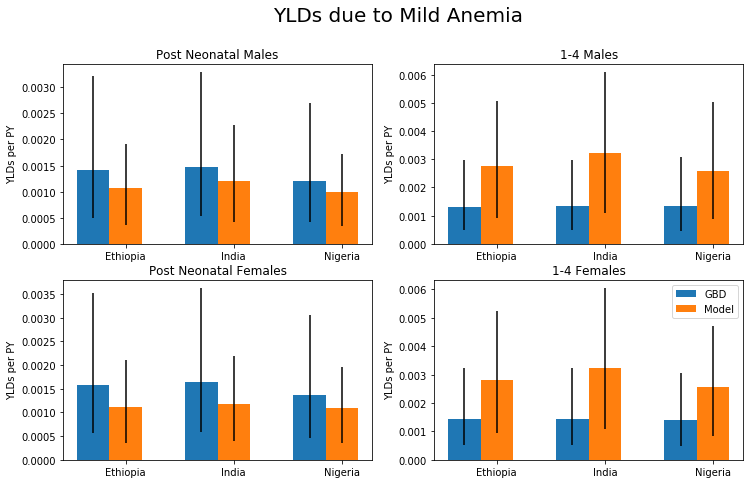

In [322]:
make_anemia_ylds_plots('mild')

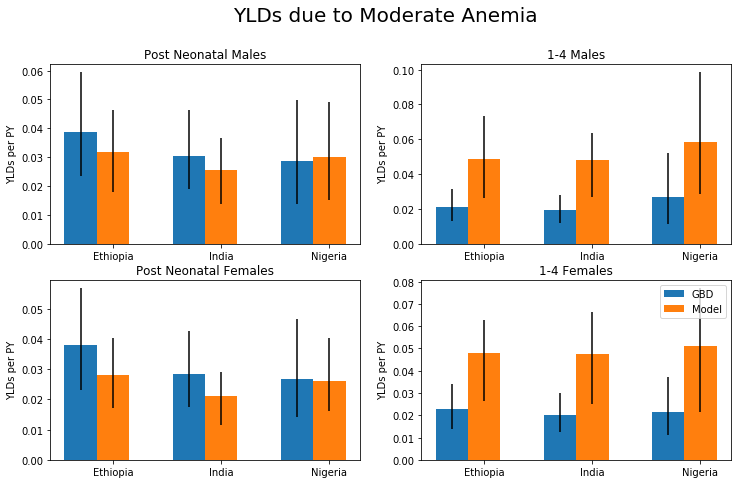

In [323]:
make_anemia_ylds_plots('moderate')

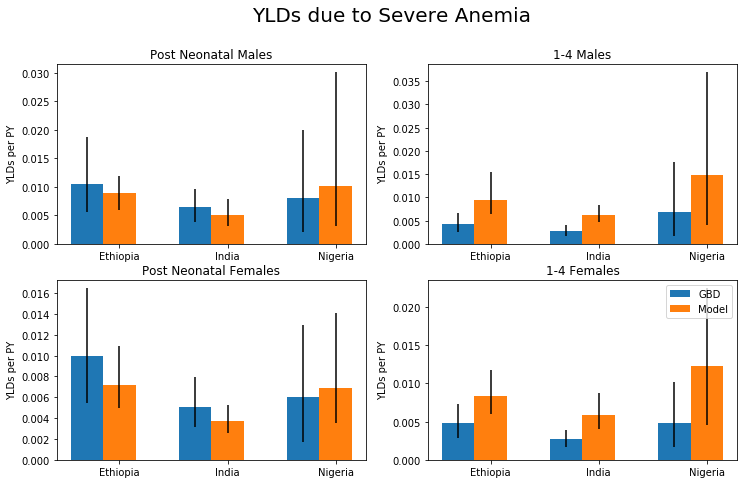

In [319]:
make_anemia_ylds_plots('severe')

# Validate anemia prevalence, this time using summed anemia prevalence from sequela IDs

In [298]:
# get anemia sequela prevalence
gbd_prev = get_outputs(gbd_round_id=5, year_id=2017, location_id=[163,214,179], age_group_id=[2,3,4,5],
                     measure_id=5, metric_id=3, sequela_id=all_anemia, topic='sequela', sex_id=[1,2])
gbd_prev['anemia_group'] = np.where(gbd_prev['sequela_id'].isin(mild_anemia), 'mild',
                                   np.where(gbd_prev['sequela_id'].isin(moderate_anemia), 'moderate', 'severe'))
gbd_prev = gbd_prev.groupby(['location_id','age_group_id','sex_id','anemia_group']).sum()
gbd_prev = gbd_prev[['val','upper','lower']]

# reformat variables for compatibility
gbd_prev = gbd_prev.reset_index()
gbd_prev['age_group'] = 0
gbd_prev['age_group'] = np.where(gbd_prev['age_group_id'] == 2, 'early_neonatal', 
                           np.where(gbd_prev['age_group_id'] == 3, 'late_neonatal',
                                    np.where(gbd_prev['age_group_id'] == 4, 'post_neonatal', 
                                            '1_to_4')))
gbd_prev['sex'] = np.where(gbd_prev['sex_id'] == 1, 'male', 'female')
gbd_prev['location'] = np.where(gbd_prev['location_id'] == 163, 'India',
                          np.where(gbd_prev['location_id'] == 214, 'Nigeria', 'Ethiopia'))
gbd_prev = gbd_prev.drop(columns=['age_group_id','location_id','sex_id'])
gbd_prev = gbd_prev.sort_values(by='location').rename(columns={'val':'mean'})
gbd_prev.head()

,anemia_group,mean,upper,lower,age_group,sex,location
35,severe,0.042096,0.062404,0.026174,late_neonatal,female,Ethiopia
26,severe,0.049205,0.078335,0.028667,early_neonatal,male,Ethiopia
27,mild,0.259696,0.305664,0.195815,early_neonatal,female,Ethiopia
28,moderate,0.458502,0.555582,0.348865,early_neonatal,female,Ethiopia
29,severe,0.042156,0.062257,0.026226,early_neonatal,female,Ethiopia


In [299]:
gbd_prev['mean'].where(gbd_prev['anemia_group'] == 'mild').where(gbd_prev['age_group'] == 'post_neonatal').where(gbd_prev['sex'] == 'male').dropna().values

array([0.25257521, 0.27164247, 0.2473475 ])

In [304]:
# define plotting function
def make_anemia_prevalence_plots(severity):
    barWidth = 0.3

    fig,axs = plt.subplots(2,2)

    model = model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'male').dropna().values
    model_min = (model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'male').dropna().values
                    - model_anemia['value','min'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'male').dropna().values)
    model_max = (model_anemia['value','max'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'male').dropna().values
                    - model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'male').dropna().values)

    gbd = gbd_prev['mean'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == 'post_neonatal').where(gbd_prev['sex'] == 'male').dropna().values
    gbd_lower = (gbd_prev['mean'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == 'post_neonatal').where(gbd_prev['sex'] == 'male').dropna().values
                 - gbd_prev['lower'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == 'post_neonatal').where(gbd_prev['sex'] == 'male').dropna().values)
    gbd_upper = (gbd_prev['upper'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == 'post_neonatal').where(gbd_prev['sex'] == 'male').dropna().values
                 - gbd_prev['mean'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == 'post_neonatal').where(gbd_prev['sex'] == 'male').dropna().values)

    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[0,0].bar(a, gbd, yerr=[gbd_lower, gbd_upper], width=barWidth)
    axs[0,0].bar(b, model, yerr=[model_min, model_max], width=barWidth)
    axs[0,0].set_title('Post Neonatal Males')


    model = model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'male').dropna().values
    model_min = (model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'male').dropna().values
                    - model_anemia['value','min'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'male').dropna().values)
    model_max = (model_anemia['value','max'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'male').dropna().values
                    - model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'male').dropna().values)

    gbd = gbd_prev['mean'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == '1_to_4').where(gbd_prev['sex'] == 'male').dropna().values
    gbd_lower = (gbd_prev['mean'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == '1_to_4').where(gbd_prev['sex'] == 'male').dropna().values
                 - gbd_prev['lower'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == '1_to_4').where(gbd_prev['sex'] == 'male').dropna().values)
    gbd_upper = (gbd_prev['upper'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == '1_to_4').where(gbd_prev['sex'] == 'male').dropna().values
                 - gbd_prev['mean'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == '1_to_4').where(gbd_prev['sex'] == 'male').dropna().values)

    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[0,1].bar(a, gbd, yerr=[gbd_lower, gbd_upper], width=barWidth)
    axs[0,1].bar(b, model, yerr=[model_min, model_max], width=barWidth)
    axs[0,1].set_title('1-4 Males')

    model = model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'female').dropna().values
    model_min = (model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'female').dropna().values
                    - model_anemia['value','min'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'female').dropna().values)
    model_max = (model_anemia['value','max'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'female').dropna().values
                    - model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == 'post_neonatal').where(model_anemia['sex'] == 'female').dropna().values)

    gbd = gbd_prev['mean'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == 'post_neonatal').where(gbd_prev['sex'] == 'female').dropna().values
    gbd_lower = (gbd_prev['mean'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == 'post_neonatal').where(gbd_prev['sex'] == 'female').dropna().values
                 - gbd_prev['lower'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == 'post_neonatal').where(gbd_prev['sex'] == 'female').dropna().values)
    gbd_upper = (gbd_prev['upper'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == 'post_neonatal').where(gbd_prev['sex'] == 'female').dropna().values
                 - gbd_prev['mean'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == 'post_neonatal').where(gbd_prev['sex'] == 'female').dropna().values)

    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[1,0].bar(a, gbd, yerr=[gbd_lower, gbd_upper], width=barWidth)
    axs[1,0].bar(b, model, yerr=[model_min, model_max], width=barWidth)
    axs[1,0].set_title('Post Neonatal Females')


    model = model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'female').dropna().values
    model_min = (model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'female').dropna().values
                    - model_anemia['value','min'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'female').dropna().values)
    model_max = (model_anemia['value','max'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'female').dropna().values
                    - model_anemia['value','mean'].where(model_anemia['anemia_group'] == severity).where(model_anemia['age_group'] == '1_to_4').where(model_anemia['sex'] == 'female').dropna().values)

    gbd = gbd_prev['mean'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == '1_to_4').where(gbd_prev['sex'] == 'female').dropna().values
    gbd_lower = (gbd_prev['mean'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == '1_to_4').where(gbd_prev['sex'] == 'female').dropna().values
                 - gbd_prev['lower'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == '1_to_4').where(gbd_prev['sex'] == 'female').dropna().values)
    gbd_upper = (gbd_prev['upper'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == '1_to_4').where(gbd_prev['sex'] == 'female').dropna().values
                 - gbd_prev['mean'].where(gbd_prev['anemia_group'] == severity).where(gbd_prev['age_group'] == '1_to_4').where(gbd_prev['sex'] == 'female').dropna().values)

    a = np.arange(len(model))
    b = [x + barWidth for x in a]
    axs[1,1].bar(a, gbd, yerr=[gbd_lower, gbd_upper], width=barWidth)
    axs[1,1].bar(b, model, yerr=[model_min, model_max], width=barWidth)
    axs[1,1].set_title('1-4 Females')


    plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
             xticklabels=np.unique(model_anemia['location']))

    for ax in axs.flat:
        ax.set(ylabel='Prevalence')

    plt.legend(['GBD','Model'], loc='best')
    plt.suptitle(f'Prevalence of {severity.capitalize()} Anemia',x=0.9, y=1.7,fontsize=20)
    plt.subplots_adjust(right=1.7, top=1.5)
    #plt.tight_layout()

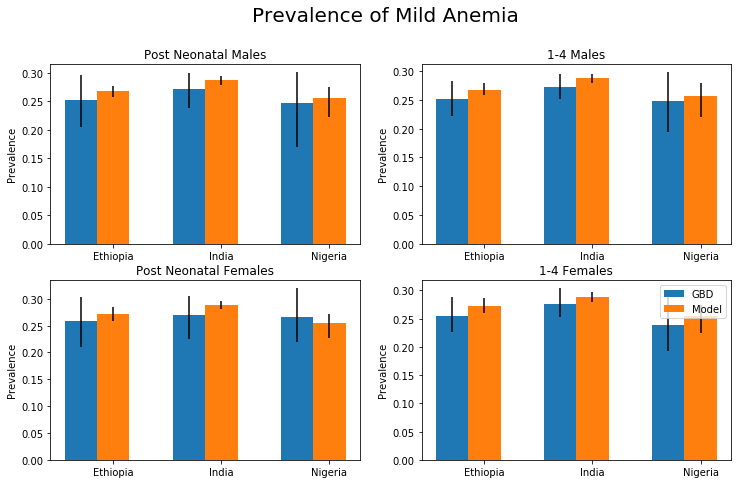

In [305]:
make_anemia_prevalence_plots('mild')

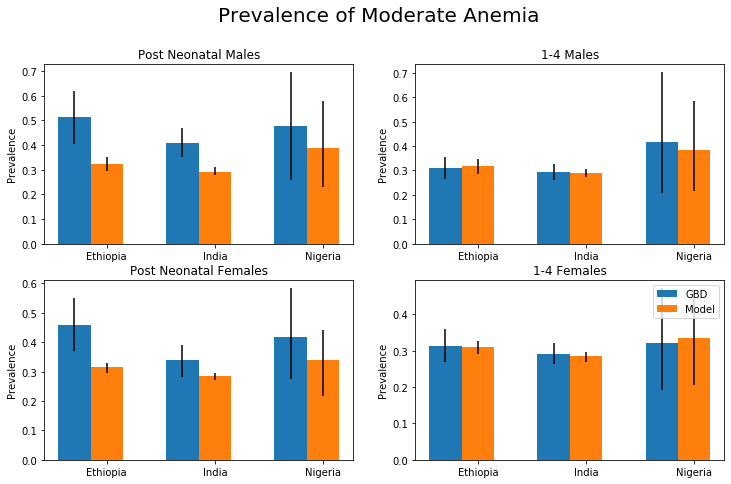

In [306]:
make_anemia_prevalence_plots('moderate')

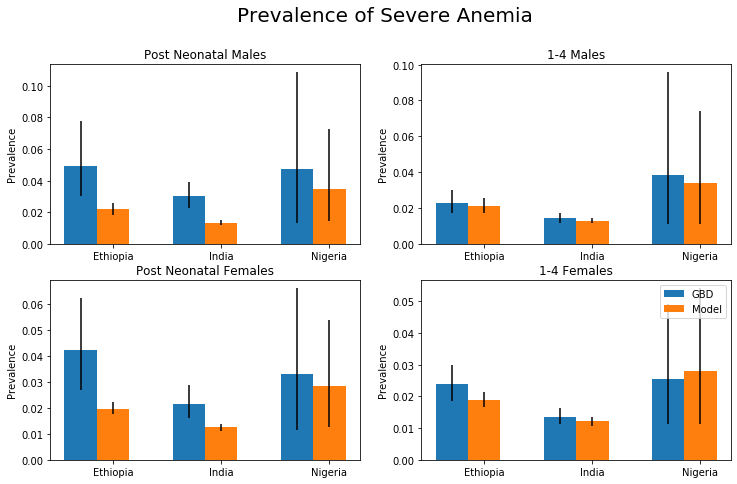

In [307]:
make_anemia_prevalence_plots('severe')